# Introduction

Molecular energy levels are determined by electronic, vibrational and rotational levels. Spectral lines are dense and they form so called band spectra. Within single band, referent point is determined by electronic or vibrational level. Selection rules for rotational spectra is $\Delta J = 0, \pm 1$, with forbidden $J = 0 \to 0$.

$R$-branch of spectra is branch with one of rotational level being $J' = 1$. Fortan's parabola is described by:

\begin{equation}
k = k_0 + (B' + B'') (J'' + 1) + (B' - B'')(J'' + 1)^2
\end{equation}

# Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.constants import hbar

In [2]:
data = pd.read_csv("../data/cn.csv", sep=" ")

In [3]:
data

,J,λ,k
0,0,3878.40,0.000258
1,1,3878.00,0.000258
2,2,3877.44,0.000258
3,3,3876.96,0.000258
4,4,3876.40,0.000258
5,5,3875.84,0.000258
6,6,3875.28,0.000258
7,7,3874.72,0.000258
8,8,3874.08,0.000258
9,9,3873.36,0.000258


In [4]:
def parabola(x, *args):
    return args[0] + args[1] * x + args[2] * x ** 2

In [5]:
data.columns

Index(['J', 'λ', 'k'], dtype='object')

In [6]:
j = data["J"].values
k = data["k"].values * 10 ** 10

In [7]:
popt, pcov = curve_fit(parabola, j + 1, k, p0=[2e-3, 100, 10])

In [8]:
j_0 = np.linspace(-1, 10, 200)

Text(0.5, 0, "$J''$")

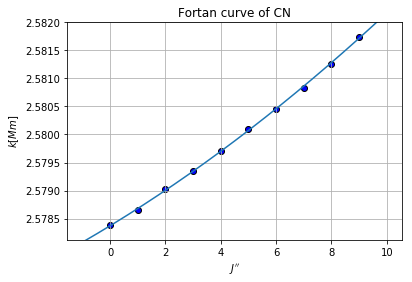

In [9]:
fig, ax = plt.subplots()

ax.scatter(j, k * 10 ** -6, c='b', edgecolor='k')
ax.plot(j_0, parabola(j_0 + 1, *popt) * 10 ** -6)

ax.grid()

ax.set_ylim((.9999 * k.min() * 10 ** -6, 1.0001 * k.max() * 10 ** -6))

ax.set_title("Fortan curve of CN")
ax.set_ylabel(r"$k[Mm]$")
ax.set_xlabel(r"$J''$")

In [10]:
b_1 = (popt[1] + popt[2]) / 2
b_2 = (popt[1] - popt[2]) / 2

In [11]:
delta = (np.sqrt(pcov[1, 1]) + np.sqrt(pcov[2, 2])) / 2

In [12]:
b_1, b_2, delta

(146.17452560353468, 138.25791460956538, 6.170608799469187)

\begin{equation}
\begin{aligned}
B' = (146 \pm 7) m^{-1}\\
B'' = (138 \pm 7) m^{-1}
\end{aligned}
\end{equation}

Moment of intertia is related to $B$ coefficient:

\begin{equation}
B = \frac{\hbar^2}{2I}
\end{equation}

In [14]:
def moment_of_inertia(b, db):
    return hbar ** 2 / (2 * b), hbar ** 2 / (2 * b ** 2) * db

In [15]:
i_1, d_i_1 = moment_of_inertia(b_1, delta)
i_2, d_i_2 = moment_of_inertia(b_2, delta)

In [16]:
i_1, d_i_1

(3.80408856145368e-71, 1.6058572623613524e-72)

In [17]:
i_2, d_i_2

(4.021909649039747e-71, 1.795024258909058e-72)

\begin{equation}
\begin{aligned}
I' = (3.8 \pm 0.2) 10 ^ {-71} kg m^{2}\\
I'' = (4.0 \pm 0.2) 10 ^ {-71} kg m^{2}
\end{aligned}
\end{equation}